Data diri

*   Username : yasir-rtx
*   Nama     : Muhammad Yasir
*   email    : yasir112358@gmail.com
*   no.tlp   : 081240125792

file tree

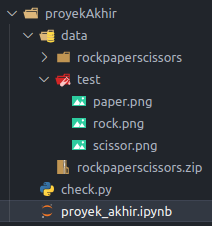

### Import Library

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import tensorflow as tf
import zipfile as zip
import os

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import image_dataset_from_directory

2024-02-02 17:26:44.253478: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-02 17:26:44.253530: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-02 17:26:44.254789: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-02 17:26:44.261813: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-02 17:26:45.047632: W tensorflow/compiler/tf2

### Preprocessing Data

In [2]:
dataset = './data/rockpaperscissors/rockpaperscissors/rps-cv-images/'
if os.path.exists('./data/rockpaperscissors/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt'):
    os.remove('./data/rockpaperscissors/rockpaperscissors/rps-cv-images/README_rpc-cv-images.txt')  # hapus file ini karena akan menambah jumlah class
# len(os.listdir('/tmp/rockpaperscissors/rps-cv-images'))
os.listdir('./data/rockpaperscissors/rockpaperscissors/rps-cv-images/')

data_augment = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.4
)

train_data_generator = data_augment.flow_from_directory(
    dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_data_generator = data_augment.flow_from_directory(
    dataset,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


### Model

In [3]:
model = Sequential([
    # Input Layer
    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
    
    # Convolution Layer
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    
    # Flatten Layer
    Flatten(),
    
    # Fully Connected Layer
    Dense(512, activation='relu'),
    Dropout(0.25),
    
    # Output Layer
    Dense(3, activation='softmax')
])

# model.summary()

# model.compile(loss='categorical_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

# myCallBacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]
class myCall(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') >= 0.95 and logs.get('val_accuracy') >= 0.95 and logs.get('loss') <= 0.1 and logs.get('val_loss') <= 0.05):
            self.model.stop_training=True
            print('\nModel telah mencapai akurasi 95%')
            
    def on_train_begin(self, logs=None):
        print("Starting training")
    def on_train_end(self, logs=None):
        print("Stoping training")

2024-02-02 17:26:46.310542: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 17:26:46.353555: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-02 17:26:46.353879: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

### Train model

In [4]:
history = model.fit(
    train_data_generator,
    validation_data = validation_data_generator,
    epochs = 50,
    batch_size = 64,
    verbose = 1,
    callbacks = myCall()
)

Starting training
Epoch 1/50


2024-02-02 17:26:47.561484: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-02-02 17:26:47.853020: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-02-02 17:26:49.117913: I external/local_xla/xla/service/service.cc:168] XLA service 0x7ff46ee78b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-02 17:26:49.117950: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650 Ti, Compute Capability 7.5
2024-02-02 17:26:49.123181: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706869609.167784  106805 device_compiler.h:186] Compiled cluster using

42/42 [==============================] - 17s 328ms/step - loss: 1.1417 - accuracy: 0.3280 - val_loss: 1.0983 - val_accuracy: 0.3432
Epoch 2/50
42/42 [==============================] - 10s 244ms/step - loss: 1.1014 - accuracy: 0.3250 - val_loss: 1.0982 - val_accuracy: 0.3432
Epoch 3/50
42/42 [==============================] - 10s 246ms/step - loss: 1.0932 - accuracy: 0.3775 - val_loss: 1.0851 - val_accuracy: 0.3982
Epoch 4/50
42/42 [==============================] - 11s 275ms/step - loss: 1.0625 - accuracy: 0.4658 - val_loss: 1.0485 - val_accuracy: 0.5206
Epoch 5/50
42/42 [==============================] - 11s 264ms/step - loss: 1.0321 - accuracy: 0.5320 - val_loss: 0.9475 - val_accuracy: 0.5492
Epoch 6/50
42/42 [==============================] - 10s 246ms/step - loss: 0.8356 - accuracy: 0.6438 - val_loss: 0.6870 - val_accuracy: 0.7082
Epoch 7/50
42/42 [==============================] - 10s 251ms/step - loss: 0.6733 - accuracy: 0.7161 - val_loss: 0.5924 - val_accuracy: 0.8009
Epoch 8/50

In [5]:
akurasi = model.evaluate(train_data_generator)
akurasi_angka = akurasi[1]*100
loss_angka = akurasi[0]*100
akurasi_angka = "{:.2f}".format(akurasi_angka)
loss_angka = "{:.2f}".format(loss_angka)
print("Akurasi model adalah : {}% dengan loss : {}%" .format(akurasi_angka, loss_angka))

42/42 [==============================] - 7s 164ms/step - loss: 0.0321 - accuracy: 0.9886
Akurasi model adalah : 98.86% dengan loss : 3.21%


In [6]:
akurasi = model.evaluate(validation_data_generator)
akurasi_angka = akurasi[1]*100
loss_angka = akurasi[0]*100
akurasi_angka = "{:.2f}".format(akurasi_angka)
loss_angka = "{:.2f}".format(loss_angka)
print("Akurasi model adalah : {}% dengan loss : {}%" .format(akurasi_angka, loss_angka))

28/28 [==============================] - 4s 159ms/step - loss: 0.0473 - accuracy: 0.9851
Akurasi model adalah : 98.51% dengan loss : 4.73%


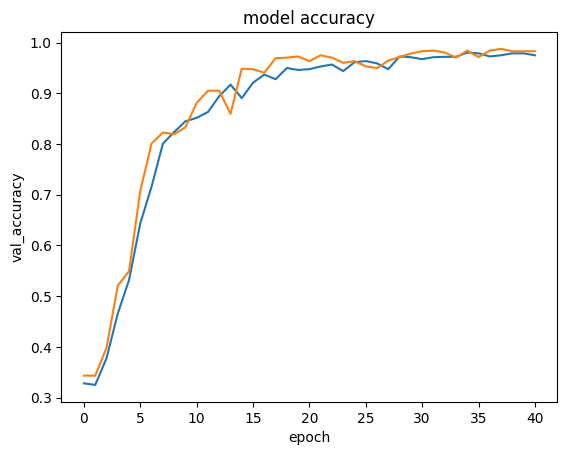

In [7]:
plt.title('model accuracy')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.ylabel('val_accuracy')
plt.xlabel('epoch')
plt.show()

1/1 [==============================] - 0s 20ms/step
./data/test/rock.jpg
Gambar yang anda input adalah : rock


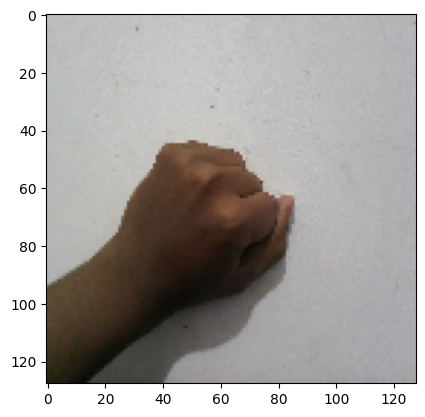

In [15]:
# periksa nama label dari data generator
# label = (train_data_generator.class_indices)
# print(label) #{'paper': 0, 'rock': 1, 'scissors': 2}

test_dir = './data/test/'
for path in os.listdir(test_dir):
    path = os.path.join(test_dir, path)
    

    # predicting images
    img = image.load_img(path, target_size=(128,128))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images)

    if classes[0][0] == 1:
        prediction = 'paper'
    elif classes[0][1] == 1:
        prediction = 'rock'
    else:
        prediction = 'scissors'
        
    print(path)
    print("Gambar yang anda input adalah : {}" .format(prediction))